# Oxford NERC DTP Hackathon 2024 - ESA x GDA Challenge 
## Identifying and addressing urban heat islands (UHIs) challenges in the Global South with EO data

<img src="fig_challenge2.jpg" width=800 /> 

Your challenge is to use multiple sources of Earth Observation (EO) data to create knowledge, products, or services that will help a chosen client in the Global South to identify UHIs within their city and inform on the risk to the local population.
As part of the challenge, you will also think about how your client can effectively uptake your knowledge, products, or services and implement it for adaptation or mitigation purposes.
If you choose to focus on mitigation strategies, you should consider how to translate the gained knowledge into actionable information for your given clients (i.e., local practitioners or other stakeholders). Focusing on adaptation strategies will require thinking of suitable solutions (e.g. nature-based solutions) to reduce the urban heat islands of your chosen region. Regardless of the specific focus, you should think through the general challenges of capacity building in the Global South and develop a project plan that tries to tackle the identified challenges. 


<b> How to use this notebook ? <b>
- The Notebooks provide example of routines coded in Python to illustrate the tool you will be pitching.
- This Notebook includes questions to guide you for creating using ESA-CCI data but can be adapted for heatwaves.
- You are welcome to edit and change the codes and use other datasets depending on your chosen application.

<b> Learning objectives of this Notebook :<b>

- Get acquainted with and use observational (and reanalysis) climate data (netCDF files)
- Learn about the different satellite-derived data, sensors and missions for producing Essential Climate Variables.
- Compute and identify urban heat islands from satellite-derived Essential Climate Variables.

<b> 1. Accessing Earth Observations ECVs data from ESA CCI <b>

Essential climate variables (ECVs) critically contribute to the characterisation of Earth' s climate, providing a picture of climate change at a global scale. Systematic observation of Earth’s climate is the fundamental basis upon which the UNFCCC was founded and the Paris Agreement adopted. The Global Climate Observing System (GCOS) currently specifies 55 ECVs, of which about 60 per cent can be addressed by satellite data.

<img src="cci_logo.png" width=800 /> 
Satellite observations are unique in providing global coverage and time series of consistent observation. ESA’s Climate Change Initiative (CCI) exploits the full satellite archive to develop the scientific basis and produce data records of the 27 ECVs that cover the whole world with some spanning more than 4 decades. https://climate.esa.int/en/data/#/dashboard

All ESA CCI data are accessible on JASMIN's CEDA Archive via the path: /neodc/esacci/

In [1]:
#Relevant Libraries
import numpy as np
import xarray as xr
from glob import glob
import datetime
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib.image as mpimg

- Selection of region of interest

In [2]:
lon_bnds, lat_bnds = (-20, 20), (0,20)
from functools import partial
def _preprocess(x, lon_bnds, lat_bnds):
    return x.sel(lon=slice(*lon_bnds), lat=slice(*lat_bnds))
partial_func = partial(_preprocess, lon_bnds=lon_bnds, lat_bnds=lat_bnds)

- Land Surface Temperature data access

This functions opens daily Land Surface Temperature data from start_year to end_year, for the summer months (JJAS)

In [3]:
(start_year, end_year) = (2015, 2016)

In [4]:
years = np.arange(start_year,end_year+1)
MM=['06','07','08','09']
yearList=years.tolist()
#SENTINEL3B_SLSTR_L3C_0.0
path = "/neodc/esacci/land_surface_temperature/data/AQUA_MODIS/L3C/0.01/v3.00/daily"
list_files = []
for year in yearList: 
     for m in MM:
         list_files += glob("{path}/*{year}/*{month}/*/*_DAY-*.nc".format(path=path, year=year, month=m))
print("%s files opened"%(len(list_files)))
drop_variables = ['satze', 'solaz','sataz', 'solze', 'qual_flag']  # too much processing time, remove all variables not needed 
fileLST = xr.open_mfdataset(paths=list_files , drop_variables=drop_variables, combine='by_coords',  preprocess=partial_func)

244 files opened


- Plotting Land Surface Temperature data 

In [5]:
#Accessing variables
fileLST

<xarray.Dataset>
Dimensions:          (time: 244, lat: 2000, lon: 4000, length_scale: 1,
                      channel: 2)
Coordinates:
  * time             (time) datetime64[ns] 2015-06-01 2015-06-02 ... 2016-09-30
  * lat              (lat) float32 0.005 0.01499 0.025 ... 19.98 19.98 19.99
  * lon              (lon) float32 -20.0 -19.99 -19.98 ... 19.98 19.98 19.99
  * channel          (channel) float32 11.0 12.0
Dimensions without coordinates: length_scale
Data variables:
    dtime            (time, lat, lon) timedelta64[ns] dask.array<chunksize=(1, 2000, 4000), meta=np.ndarray>
    lst              (time, lat, lon) float32 dask.array<chunksize=(1, 2000, 4000), meta=np.ndarray>
    lst_uncertainty  (time, lat, lon) float32 dask.array<chunksize=(1, 2000, 4000), meta=np.ndarray>
    lst_unc_ran      (time, lat, lon) float32 dask.array<chunksize=(1, 2000, 4000), meta=np.ndarray>
    lst_unc_loc_atm  (time, lat, lon) float32 dask.array<chunksize=(1, 2000, 4000), meta=np.ndarray>
    lst_unc_loc_sfc  (time, lat, lon) float32 dask.array<chunksize=(1, 2000, 4000), meta=np.ndarray>
    lst_unc_sys      (time, length_scale) float32 dask.array<chunksize=(1, 1), meta=np.ndarray>
    lcc              (time, lat, lon) float32 dask.array<chunksize=(1, 2000, 4000), meta=np.ndarray>
Attributes: (12/41)
    title:                      ESA LST CCI land surface temperature data at ...
    institution:                University of Leicester
    source:                     ESA LST CCI MODISA L3U V3.00
    history:                    Created using software developed at Universit...
    references:                 https://climate.esa.int/en/projects/land-surf...
    Conventions:                CF-1.8
    ...                         ...
    geospatial_lon_resolution:  0.01
    geospatial_lat_resolution:  0.01
    key_variables:              land_surface_temperature
    format_version:             CCI Data Standards v2.2
    spatial_resolution:         0.01 degree
    doi:                        10.5285/6babb8d9a8d247bcb3da6aed42f4b59a

In [6]:
lon=fileLST['lon']
lat=fileLST['lat']
lst_YY=fileLST['lst']

In [7]:
lst_mean=lst_YY.mean(dim='time') - 273.15

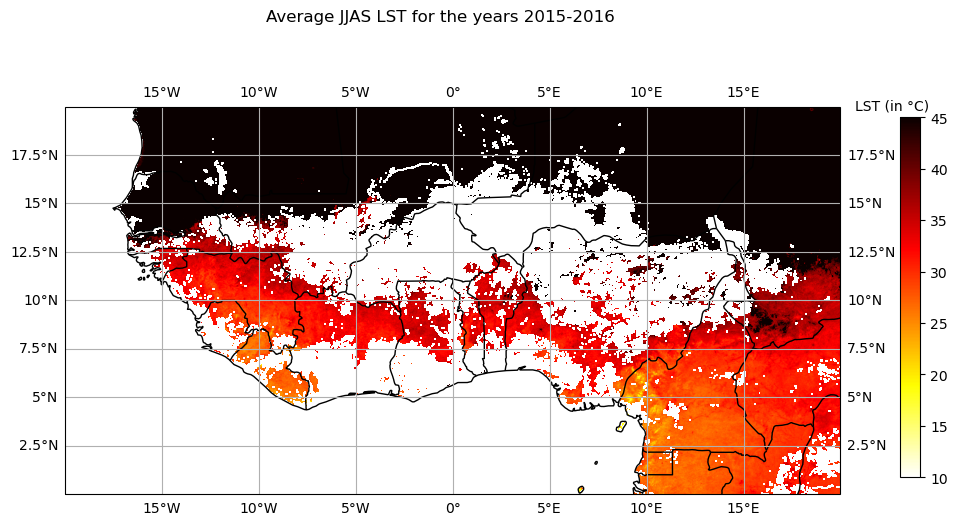

In [8]:
var, unit= 'LST','°C'
lonmin= lon.min()
lonmax= lon.max() 
latmin= lat.min()
latmax= lat.max()
import cartopy.feature as cf
fig, ax = plt.subplots(figsize=(10, 6),
                      subplot_kw={'projection': ccrs.PlateCarree()})
ax.coastlines()
ax.add_feature(cf.BORDERS)
ax.set_extent([lonmin, lonmax, latmin, latmax], crs=ccrs.PlateCarree())
ax.gridlines(draw_labels=True)
ax.set_xlabel('longitude')
ax.set_ylabel('latitude')
im=ax.imshow(lst_mean, cmap='hot_r',  vmin=10, vmax= 45,origin='lower',  extent=[lonmin, lonmax, latmin, latmax])
cbar_ax = fig.add_axes([0.96, 0.2, 0.02, 0.6])
clb = fig.colorbar(im, cax=cbar_ax)
clb.set_label('%s (in %s)'%(var, unit), labelpad=-40, y=1.05, rotation=0)
plt.suptitle("Average JJAS LST for the years %s-%s"%(start_year, end_year))
plt.savefig('figname.png')

<b> 2. Accessing Reanalysis data from ERA 5 <b>

For applications such as measuring the impact of heat for human populations may equire additional ECVs not provided by ESA's  Earth Observations such as relative humidity. For this, you could use ERA 5 reanalysis data.

Reanalysis data provide the most complete picture currently possible of past weather and climate. They are a blend of observations with past short-range weather forecasts rerun with modern weather forecasting models.

ERA5 is the fifth generation ECMWF atmospheric reanalysis of the global climate covering the period from January 1940 to present. ERA5 is produced by the Copernicus Climate Change Service (C3S) at ECMWF. It provides hourly estimates of a large number of atmospheric, land and oceanic climate variables. The data cover the Earth on a 31km grid and resolve the atmosphere using 137 levels from the surface up to a height of 80km. ERA5 includes information about uncertainties for all variables at reduced spatial and temporal resolutions.

All ESA CCI data are accessible on JASMIN's CEDA Archive via the path: /neodc/esacci/

<b>3. Plotting Surface Urban Heat Island from CCI data<b>

Select a region surrounding a city. The example used here is Accra, Ghana. Since we want to look at the difference in LST between the urbanised area and the local surroundings, try to choose a region that contains a sensible sample of the city's non-urban surroundings.

First, read the LST data for this region, in the same way as was done earlier in the notebook.

In [13]:
lon_bnds, lat_bnds = (-1, 1), (5, 6.25)
partial_func = partial(_preprocess, lon_bnds=lon_bnds, lat_bnds=lat_bnds)
path = "/neodc/esacci/land_surface_temperature/data/AQUA_MODIS/L3C/0.01/v3.00/daily"
list_files = []
for year in yearList: 
     for m in MM:
         list_files += glob("{path}/*{year}/*{month}/*/*_DAY-*.nc".format(path=path, year=year, month=m))
print("%s files opened"%(len(list_files)))
drop_variables = ['satze', 'solaz','sataz', 'solze', 'qual_flag']  # too much processing time, remove all variables not needed 
fileLST = xr.open_mfdataset(paths=list_files , drop_variables=drop_variables, combine='by_coords',  preprocess=partial_func)

244 files opened


We also need to read the land cover for this region, to identify which pixels are urban and which are not. Here, 2015 has been chosen as a representative year for the land cover.

In [30]:
cci_land_cover = xr.open_dataset("/neodc/esacci/land_cover/data/land_cover_maps/v2.0.7/ESACCI-LC-L4-LCCS-Map-300m-P1Y-2015-v2.0.7b.nc")
land_cover_lst_resolution = cci_land_cover.interp_like(fileLST, method='nearest') # interpolate the land cover (300m) to the LST grid (0.01 deg)

Compare the maps of land cover and mean LST. The large urban area on the coast (Accra) clearly has a warmer surface than the observed nearby areas.

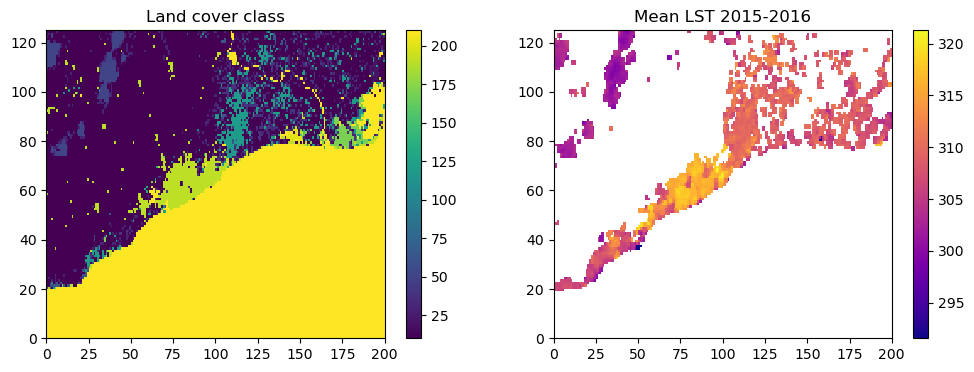

In [28]:
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

land_cover_map = axs[0].pcolormesh(land_cover_lst_resolution.lccs_class)
plt.colorbar(land_cover_map, ax=axs[0])
axs[0].set_title('Land cover class')

lst_map = axs[1].pcolormesh(fileLST.lst.mean('time'), cmap=cm.plasma)
plt.colorbar(lst_map, ax=axs[1])
axs[1].set_title(f'Mean LST {start_year}-{end_year}')
plt.show()

Create time series of area-averaged LST in urban and non-urban pixels (ignoring water bodies). See the following link for the meaning of each integer land cover code: https://maps.elie.ucl.ac.be/CCI/viewer/download/ESACCI-LC-QuickUserGuide-LC-Maps_v2-0-7.pdf

In [31]:
urban_lst = fileLST.lst.where(land_cover_lst_resolution.lccs_class==190).mean(['lat', 'lon']) # spatial mean of LST where the land cover is urban
nonurban_lst = fileLST.lst.where(~np.isin(land_cover_lst_resolution.lccs_class, [190, 210])).mean(['lat', 'lon']) # spatial mean of LST where the land cover is not a water body and also not urban

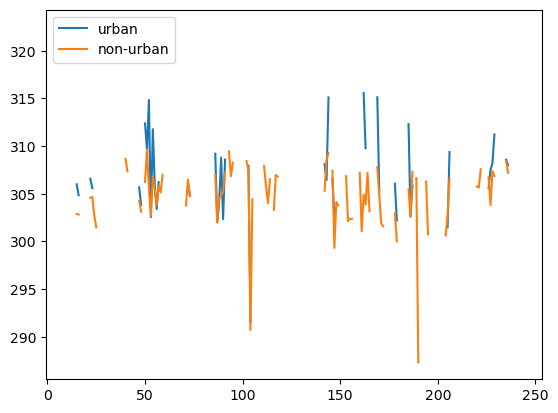

In [32]:
plt.figure()
plt.plot(urban_lst, label='urban')
plt.plot(nonurban_lst, label='non-urban')
plt.legend(loc='best')
plt.show()

We can define a Surface Urban Heat Island index as the mean difference between urban and non-urban LSTs over the time series

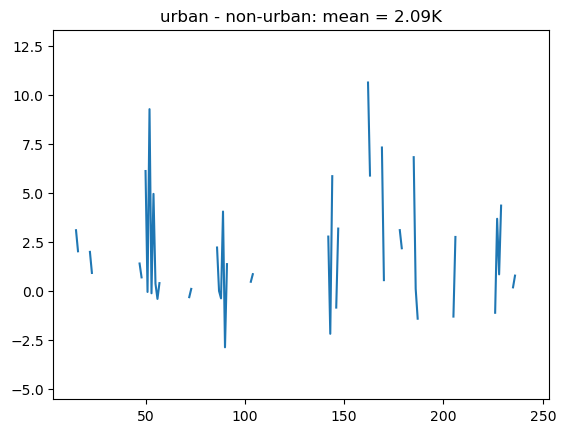

In [33]:
plt.figure()
diff = urban_lst - nonurban_lst
plt.plot(diff)
diff_index = diff.mean('time').data.compute()
plt.title(f'urban - non-urban: mean = {diff_index:0.2f}K')
plt.show()

<b>4. Accessing socio-economic datasets from CIESIN <b>

The The Center for International Earth Science Information Network at Columbia University hosts a Data Center in NASA's Earth Observing System Data and Information System. It provides access to gridded data of different relevant socio-economic data, such as the Gridded Population of the World (GPW) collection.
The Gridded Population of the World (GPW) collection, now in its fourth version (GPWv4), models the distribution of human population (counts and densities) on a continuous global raster surface. Since the release of the first version of this global population surface in 1995, the essential inputs to GPW have been population census tables and corresponding geographic boundaries. The purpose of GPW is to provide a spatially disaggregated population layer that is compatible with data sets from social, economic, and Earth science disciplines, and remote sensing. It provides globally consistent and spatially explicit data for use in research, policy-making, and communications.
https://sedac.ciesin.columbia.edu/data/collection/gpw-v4 

Questions to guide you :

- Look at the anomalies during extreme heat events. For this, you can use the EM-DATA disaster database to identify key extreme heat events: https://www.emdat.be/
- Identify what type of land cover correspond to the highest land surface temperature values.
- Look at the diurnal Surface urban heat island for the different land cover classes (you might want to use ERA5 air temperature data for this application).
  
Bonus programming questions:

- Try making a matplotlib animation of the diurnal cycle of SUHI over the years.
- Create a mask of densely populated areas and cross it with the land surface temperature dataset.